In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# import fashion_mnist dataset
from tensorflow.keras.datasets import fashion_mnist

# store data in variable (data are in touple)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# let's see the training data and labels for first column data
print(f"Training sample:\n{X_train[0]}\n")
print(f"Training labels:\n{y_train[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# check the shape of data
X_train.shape, y_train.shape, X_train[0].shape, y_train[0].shape

((60000, 28, 28), (60000,), (28, 28), ())

In [5]:
# Reshape and normalize the data
X_train_norm = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_norm = X_test.reshape(-1, 28, 28, 1) / 255.0

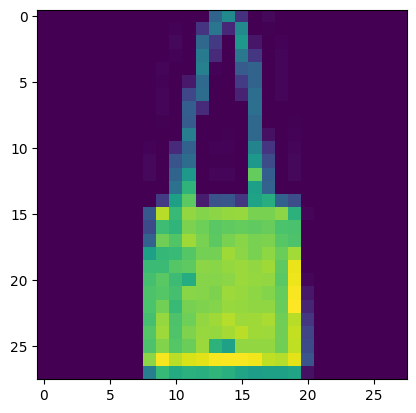

In [6]:
# plot single sample
plt.imshow(X_train_norm[200]) #! imshow for images

In [7]:
# store label names in list
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]
len(label_names)

10

In [8]:
# plot an example image and its labels

# first let's create a reusable function
def plot_single(X, y, index):
    plt.imshow(X[index], cmap=plt.cm.binary)
    plt.title(label_names[y[index]])

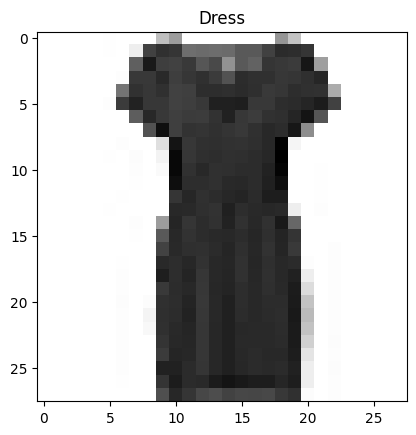

In [9]:
# now let's plot single image from data
plot_single(X_train_norm, y_train, 20)

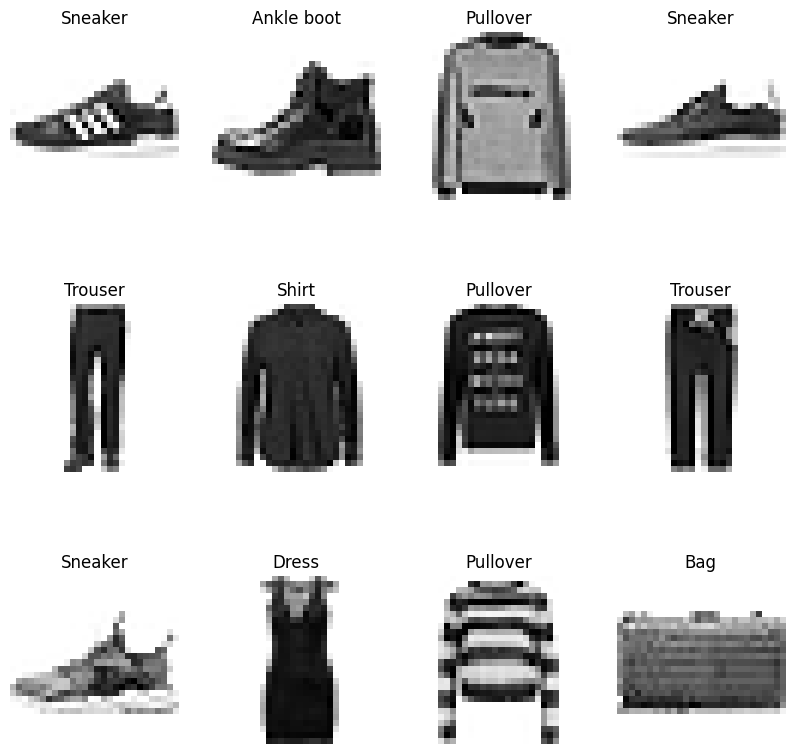

In [10]:
# plot multiple random images of fashion mnist
import random

plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.title(label_names[y_train[rand_index]])
    plt.axis(False)

In [11]:
# import random seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")

# fit the model
history = model.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 95s 50ms/step - loss: 0.4845 - accuracy: 0.8245 - val_loss: 0.3709 - val_accuracy: 0.8660
Epoch 2/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3246 - accuracy: 0.8828 - val_loss: 0.3562 - val_accuracy: 0.8689
Epoch 3/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2781 - accuracy: 0.8977 - val_loss: 0.3097 - val_accuracy: 0.8858
Epoch 4/20
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2438 - accuracy: 0.9092 - val_loss: 0.2850 - val_accuracy: 0.8959
Epoch 5/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2192 - accuracy: 0.9185 - val_loss: 0.2807 - val_accuracy: 0.8978
Epoch 6/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1967 - accuracy: 0.9266 - val_loss: 0.2906 - val_accuracy: 0.8921
Epoch 7/20
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1773 - accuracy: 0.9333 - val_loss: 0.2736 -

it has been around 80% in accuracy using normal nn classification but using CNN it's jumped over 90%

<Axes: >

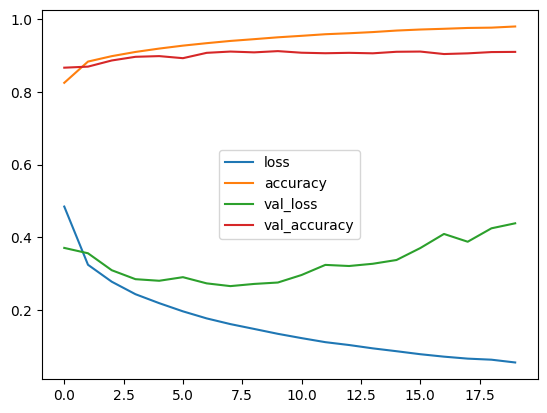

In [12]:
pd.DataFrame(history.history).plot()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

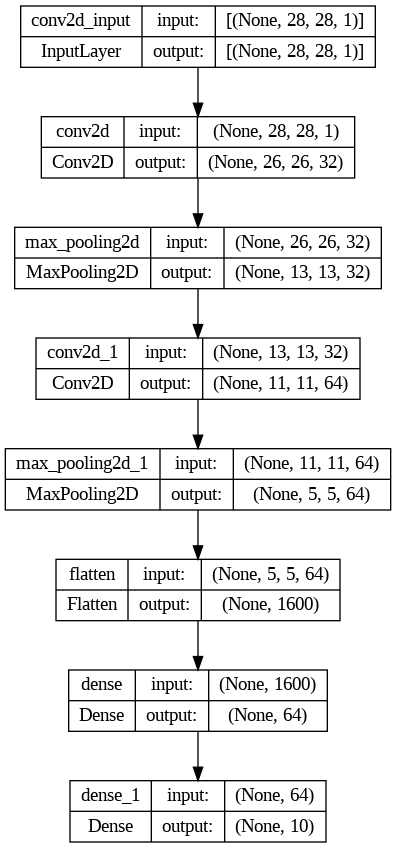

In [15]:
# Let's check out another way of viewing our deep learnng models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layers
plot_model(model, show_shapes=True)

In [16]:
# Create a confuxion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different color
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [18]:
# let's see the probabilities of our predictions
y_probs = model.predict(X_test_norm)
y_probs

313/313 [==============================] - 3s 9ms/step


array([[2.0034719e-22, 5.7165479e-17, 5.1377418e-19, ..., 7.8752725e-12,
        5.7060487e-24, 9.9999994e-01],
       [1.4806517e-08, 2.2767351e-22, 9.9999982e-01, ..., 3.7836334e-22,
        5.3599434e-18, 4.1403636e-23],
       [8.6486761e-29, 9.9999994e-01, 2.6904217e-27, ..., 0.0000000e+00,
        9.0066559e-22, 8.8370580e-32],
       ...,
       [5.7146918e-18, 3.9145236e-28, 3.2072663e-18, ..., 3.2061531e-18,
        9.9999994e-01, 1.0231880e-21],
       [1.1871968e-18, 9.9999994e-01, 3.0512268e-14, ..., 3.0321321e-34,
        2.6457259e-16, 3.9802344e-21],
       [4.5757842e-09, 6.3800453e-06, 1.9618265e-04, ..., 1.2653609e-04,
        3.3594388e-06, 3.7906412e-07]], dtype=float32)

In [19]:
# let's store the max of each probabilities as our prediction
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
from sklearn.metrics import confusion_matrix

# let's see the confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[845,   1,  13,  16,   5,   1, 109,   0,  10,   0],
       [  3, 979,   1,  11,   3,   0,   2,   0,   1,   0],
       [ 18,   1, 858,  11,  62,   1,  45,   0,   4,   0],
       [ 13,   3,   8, 919,  40,   0,  12,   0,   4,   1],
       [  3,   0,  32,  15, 911,   0,  36,   0,   2,   1],
       [  0,   0,   0,   0,   0, 984,   0,  12,   0,   4],
       [102,   0,  61,  33, 102,   0, 690,   1,  11,   0],
       [  0,   0,   0,   0,   0,  12,   0, 962,   2,  24],
       [  4,   0,   1,   1,   4,   3,   0,   2, 985,   0],
       [  1,   0,   0,   0,   0,   5,   0,  32,   1, 961]])

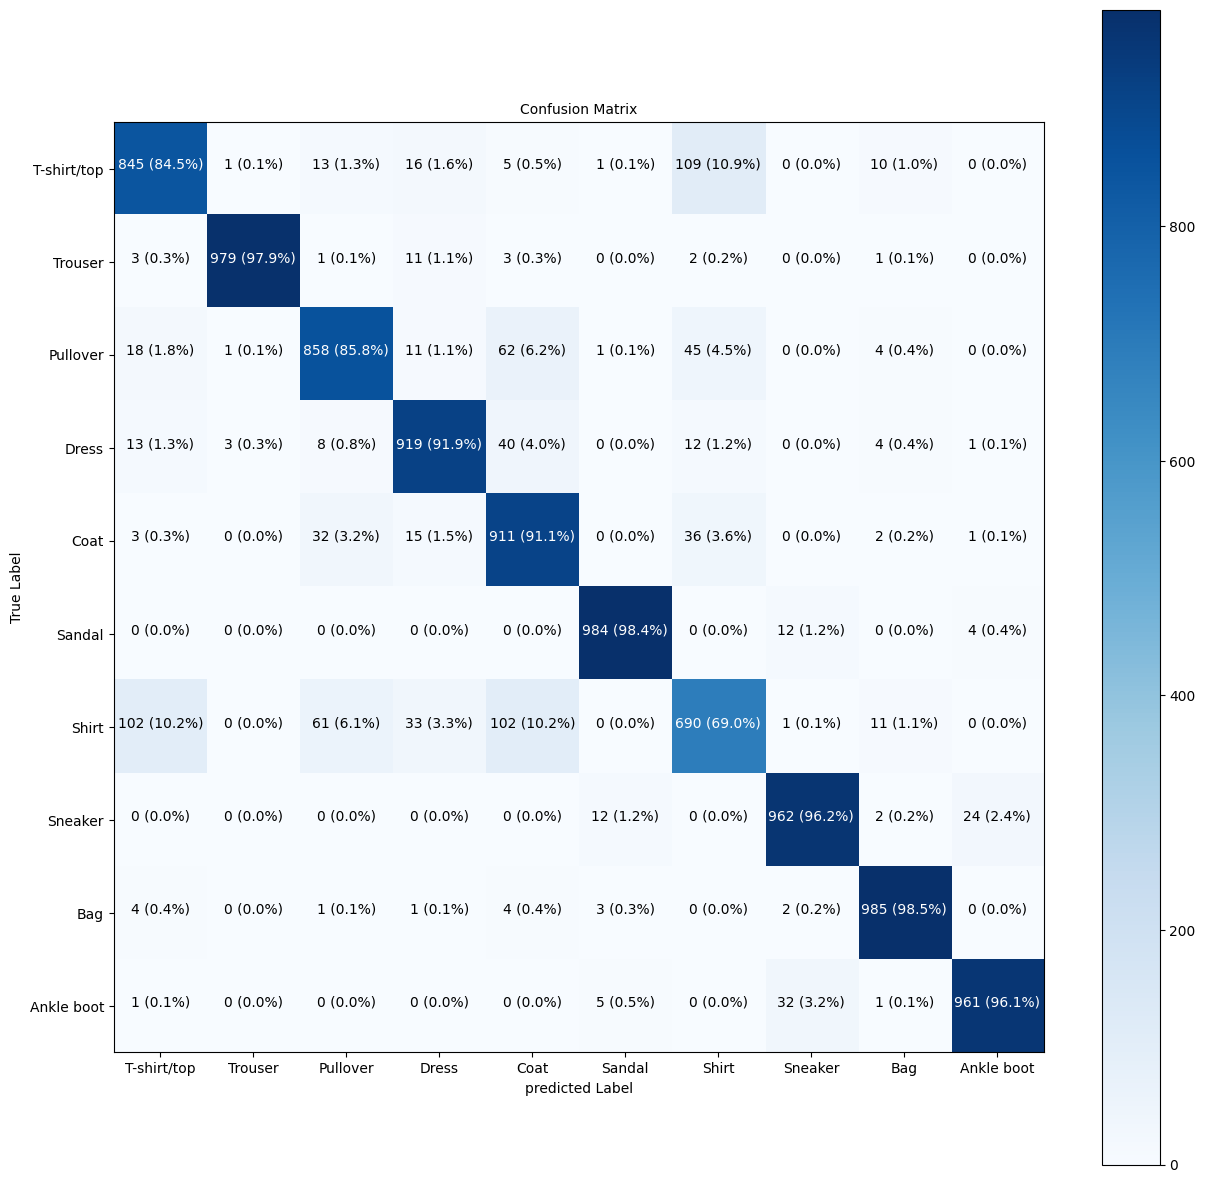

In [21]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=label_names,
                      figsize=(15, 15),
                      text_size=10)